Здравствуйте! В этой лабораторной работе Вы познакомитесь с PID контроллерами (ПИД регуляторами).

После того, как Вы ознакомились с теорией, давайте приступим к практике. В лабораторной работе 2a Вам предстоит реализовать ПИД регулятор и настроить его для предоставленной модели.

Как всегда, начнём с импортов.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

В данном лабораторной работе вы будете управлять моделью автомобиля, который движется вперёд по синусообразной дороге (с подъёмами и спусками), и на который действует сила трения. Для Вас данная модель является чёрным ящиком: Вам нет необходимости понимать её реализацию (по крайней мере пока), но нужно знать API:

1. Конструктор `__init__` инициализирует поля класса:
  * `x` - текущая позиция автомобиля;
  * `v` - текущая скорость автомобиля.
2. Функция `step` выполняет шаг моделирования системы (ничего не возвращает). Аргументы функции:
  * `input` - направление и степень "газа" для шага моделирования (от -1 до 1) - управляющий сигнал;
  * `dt` - длительность (время) шага моделирования.

In [ ]:
class BlackBox:
  def __init__(self):
    self._a = 1.23456789
    self._b = 0.000987654321
    self._c = 0.0420
    self._d = 0.0069
    self.x = 0
    self.v = 0

  def step(self, input, dt):
    self.v += (self._a * np.clip(input, -1, 1) - np.sign(self.v) * self._b * self.v ** 2 + self._c * np.sin(self._d * self.x)) * dt
    self.x += self.v * dt

Теперь Вам необходимо реализовать класс PID контроллера.

1. В конструкторе `__init__` Вам необходимо инициализировать необходимые Вам поля класса.
2. В функции `step` Вам необходимо реализовать шаг работы PID контроллера:
  * аргумент `target` - целевое значение;
  * аргумент `measured` - измеренное текущее значение;
  * аргумент `dt` - временя шага;
  * функция должна возвращать управляющий сигнал.

В качестве образца можете использовать псевдокод из статьи [PID controller](https://en.wikipedia.org/wiki/PID_controller) в Wikipedia:

```
previous_error := 0
integral := 0
loop:
   error := setpoint − measured_value
   proportional := error;
   integral := integral + error × dt
   derivative := (error − previous_error) / dt
   output := Kp × proportional + Ki × integral + Kd × derivative
   previous_error := error
   wait(dt)
   goto loop
```

In [ ]:
class PID:
  def __init__(self, p, i, d):
    self.p = p
    self.i = i
    self.d = d
    self.prev_err = 0
    self.integral = 0

  def step(self, target, measured, dt):
    err = target - measured
    proportional = err
    self.integral += err * dt
    deriv = (err - self.prev_err) / dt
    output = self.p * err + self.i * self.integral + self.d * deriv
    self.prev_err = err
    return output


Теперь давайте проведём эксперименты - будем управлять моделью автомобиля с помощью ПИД регулятора.

Первый эксперимент - поддержание скорости. Будем моделировать 1000 шагов по 0.1 с. Целевая скорость - 30 м/с.

In [ ]:
def experiment_v(pid):
  dt = 0.1
  size = 1000
  v = np.zeros(size)
  inputs = np.zeros(size)
  bb = BlackBox()
  target = 30
  for i in range(1, size):
    input = pid.step(target, bb.v, dt)
    bb.step(input, dt)
    v[i] = bb.v
    inputs[i] = input
  plt.plot(v)
  plt.axhline(y=30, color='k', linestyle='dotted')
  plt.show()
  plt.plot(np.clip(inputs, -5, 5))
  plt.show()

Ваша задача - подберите коэффициенты PID контроллера, чтобы:

* автомобиль максимально быстро достигал целевой скорости;
* скорость достаточно точно поддерживалась.

Вам помогут графики ниже:

1. график скорости от номера шага;
2. график управляющего сигнала от номера шага (для удобства ограничен от -5 до 5).

Попробуйте добиться таких же графиков, которые представлены в качестве образца ниже.

Для удобства вам доступна демонстрация `lab_2a_v.html` в той же папке, где и этот блокнот.

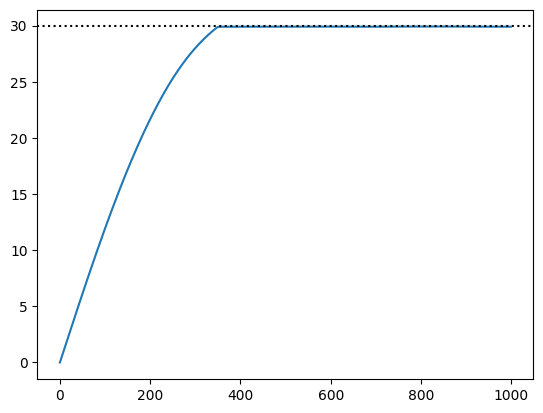

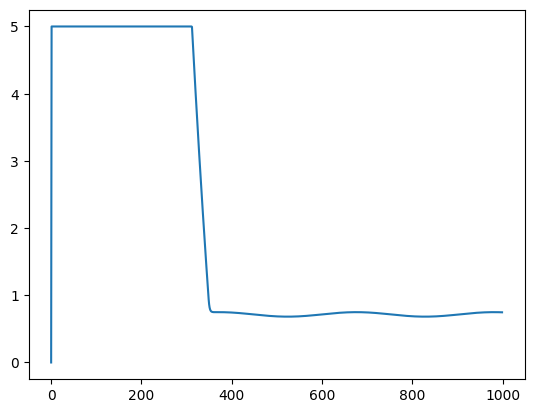

In [ ]:
experiment_v(PID(3, 0.001, 0))

Второй эксперимент - поддержание позиции. Будем моделировать 1000 шагов по 0.1 с. Целевая позиция - 1000 м.

In [ ]:
def experiment_x_1(pid):
  dt = 0.1
  size = 1000
  x = np.zeros(size)
  v = np.zeros(size)
  inputs = np.zeros(size)
  bb = BlackBox()
  target = 1000
  for i in range(1, size):
    input = pid.step(target, bb.x, dt)
    bb.step(input, dt)
    x[i] = bb.x
    v[i] = bb.v
    inputs[i] = input
  plt.plot(x)
  plt.axhline(y=1000, color='k', linestyle='dotted')
  plt.show()
  plt.plot(v)
  plt.show()
  plt.plot(np.clip(inputs, -5, 5))
  plt.show()

Ваша задача - подберите коэффициенты PID контроллера, чтобы:

* автомобиль максимально быстро достигал целевой позиции и остановился;
* достигнутая позиция соответствовала целевой с достаточной точностью.

Вам помогут графики ниже:

1. график позиции от номера шага;
2. график скорости от номера шага;
3. график управляющего сигнала от номера шага (для удобства ограничен от -5 до 5).

Попробуйте добиться таких же графиков, которые представлены в качестве образца ниже.

Для удобства вам доступна демонстрация `lab_2a_x.html` в той же папке, где и этот блокнот.

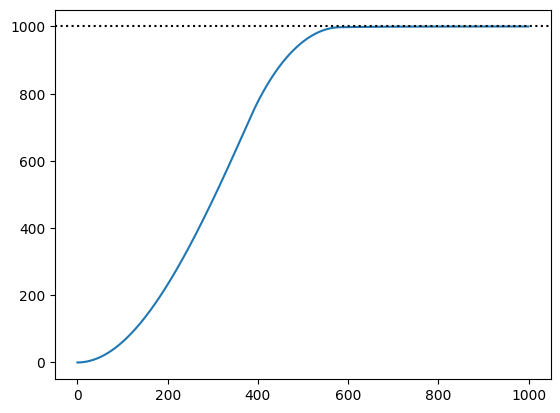

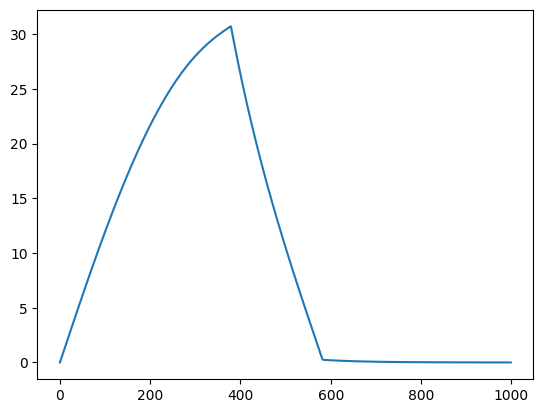

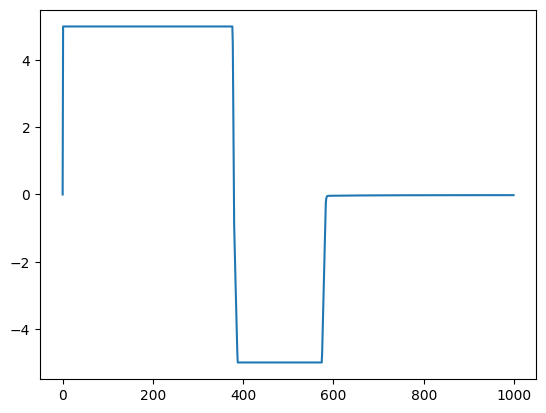

In [ ]:
experiment_x_1(PID(0.55, 0, 5.1))

Теперь давайте немного модифицируем второй эксперимент:
* будем моделировать 10000 шагов;
* будем менять целевую позицию каждые 2000 шагов: 1000, 0, 1000, 0, ...

In [ ]:
def experiment_x_2(pid):
  dt = 0.1
  size = 10000
  x = np.zeros(size)
  v = np.zeros(size)
  inputs = np.zeros(size)
  bb = BlackBox()
  for i in range(1, size):
    target = 1000 if i % 4000 < 2000 else 0
    input = pid.step(target, bb.x, dt)
    bb.step(input, dt)
    x[i] = bb.x
    v[i] = bb.v
    inputs[i] = input
  plt.plot(x)
  plt.axhline(y=1000, color='k', linestyle='dotted')
  plt.axhline(y=0, color='k', linestyle='dotted')
  plt.show()
  plt.plot(v)
  plt.show()
  plt.plot(np.clip(inputs, -5, 5))
  plt.show()

Подберите PID коэффициенты аналогично эксперименту выше.

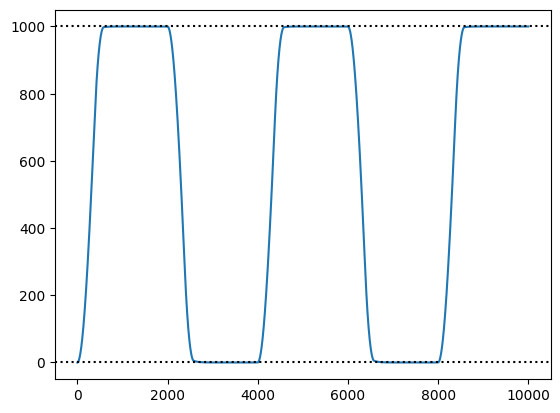

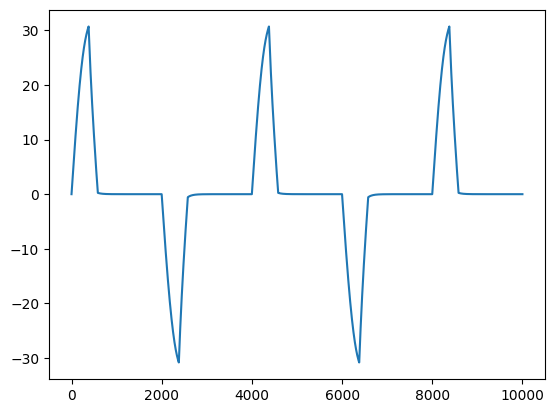

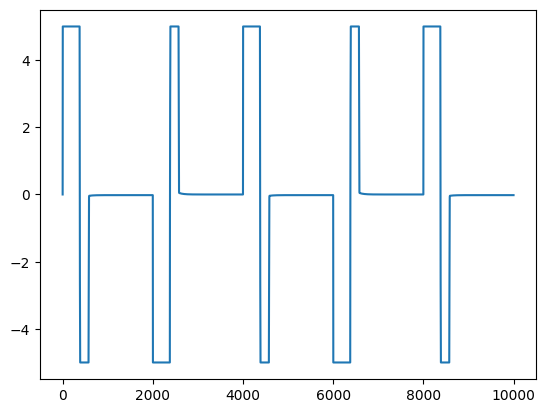

In [ ]:
experiment_x_2(PID(0.55, 0, 5.1))

Приготовьтесь ответить на следующие два вопроса:

1. Чем отличаются `experiment_x_1` и `experiment_x_2` с точки зрения ПИД регулятора?
2. Можно ли для этих двух экспериментов использовать одни и те же коэффициенты и почему?

Для этой работы сдача в автоматическом режиме пока не предусмотрена. Поэтому, Вам нужно будет показать в Discord Ваше решение.

**Задание лабораторной работы 2b** заключается в том, чтобы описать и реализовать свою модель (чёрный ящик) и настроить для неё ПИД регулятор.

1. Необходимо дать словесное описание Вашей модели. Примеры:
  * Электрический нагреватель, который нагревает комнату. При этом тепло выходит наружу. На входе - скважность подачи питания на нагреватель, на выходе - температура комнаты.
  * Вертолёт, который перемещается только по вертикальной оси. На входе - тяга, на выходе - высота.

  Модель должна обладать необходимостью:
  * учёта инерции - если управляющий сигнал установить в ноль, измеряемое значение продолжит изменяться по инерции некоторое время.
  * поддержания - если управляющий сигнал установить в ноль, то значение на выходе начнёт отклоняться от целевого;

  Соответственно, для примеров выше:
  * Если нагреватель выключить, нагретый нагреватель продолжит нагревать комнату, но когда он остынет, температура начнёт падать.
  * Если выключить тягу, вертолёт по инерции продолжит движение, но со временем начнёт падать.

2. Необходимо дать описание Вашей модели в формулах в дифференциальном виде и подобрать коэффициенты в этих формулах. Коэффициенты необходимо подобрать так, чтобы Вы могли управлять системой, но не слишком сильно. Для примеров выше:
  * Мощности нагревателя должно хватать, чтобы комната прогревалась. При этом есть подавать 20% скважности питания, то температура установится на уровне 15 градусов.
  * Максимальной тяги вертолёта хватает, чтобы взлетать со скоростью 30 м/с, но при 20% тяги вертолёт зависает на месте.

3. Необходимо реализовать класс с Вашей моделью (не забудьте ограничить управляющий сигнал на входе, например, с помощью функции [numpy.clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html)) и эксперименты, которые раскроют управление Вашей моделью. Для примеров выше:
  * Необходимо поддерживать температуру в комнате 25 градусов днём и 22 градуса ночью.
  * Необходимо взлететь на 2000 м, зависнуть на 1 минуту и приземлиться (не разбившись о землю).

4. Подберите коэффициенты ПИД регулятора для Ваших экспериментов.
5. Покажите результат преподавателю.